In [28]:

%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
from get_homography import *
from stitch3 import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
img1=cv2.imread('images/mountain-left.jpg')
img2=cv2.imread('images/mountain-middle.jpg')
img3=cv2.imread('images/mountain-right.jpg')
# img1=cv2.imread('images/small-left.jpg')
# img2=cv2.imread('images/small-middle.jpg')
# img3=cv2.imread('images/small-right.jpg')
HLM = get_homography(img1,img2)
HMR = get_homography(img2,img3)

6051
16328
Rmax4.123105625617661
(24,)
(12,)
MaxInlierCount12
Final H[[-7.36106467e-01 -3.32957001e-01  7.33382147e+02]
 [-4.98907719e-01 -1.05844052e+00  8.77283487e+02]
 [-8.42111658e-04 -1.00710390e-03  1.00000000e+00]]
16328
22657
Rmax4.47213595499958
(23,)
(17,)
MaxInlierCount17
Final H[[ 1.69624200e+00  3.61421255e-01 -6.80660717e+02]
 [ 2.35259927e-01  1.80273886e+00 -2.44690153e+02]
 [ 4.02065977e-04  5.48779302e-04  1.00000000e+00]]


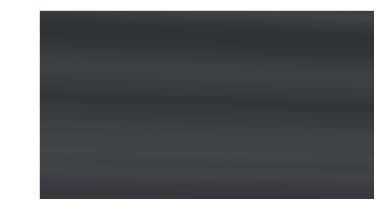

ValueError: could not broadcast input array from shape (1000,1333,3) into shape (0,0,3)

In [30]:
canvas = stitch3(img1,img2,img3,HLM,HMR)
cv2.imwrite("res.png",canvas)